### Walmart:

* Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores in the United States.
* Walmart has more than 100 million customers worldwide

#### Business Problem:

* The Management team at Walmart Inc. wants to analyze the customer purchase behavior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. 
* They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('walmart_data.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


The columns User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category have categorical values.Hence, we need to change the data type to category.

In [26]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [36]:
columns = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Marital_Status','Product_Category']
df[columns] = df[columns].astype('category')

In [38]:
df.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

In [39]:
#checking duplicates
df.duplicated().sum()

0

In [40]:
#checking descriptive characteristics
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [41]:
df.describe(include = ['object','category']).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,Single,324731
Product_Category,550068,20,5,150933


### Insights:
* There are 5891 unique users.USER_ID 1001680 shopped the most frequent from Walmart.
* There are 3631 unique products.Product_ID P00265242 is the most frequent sold item.
* Men are more frequent buyers than females.
* There are 7 unique age categories.

### Detect Outliers

In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

/Users/komalpreet/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase'>

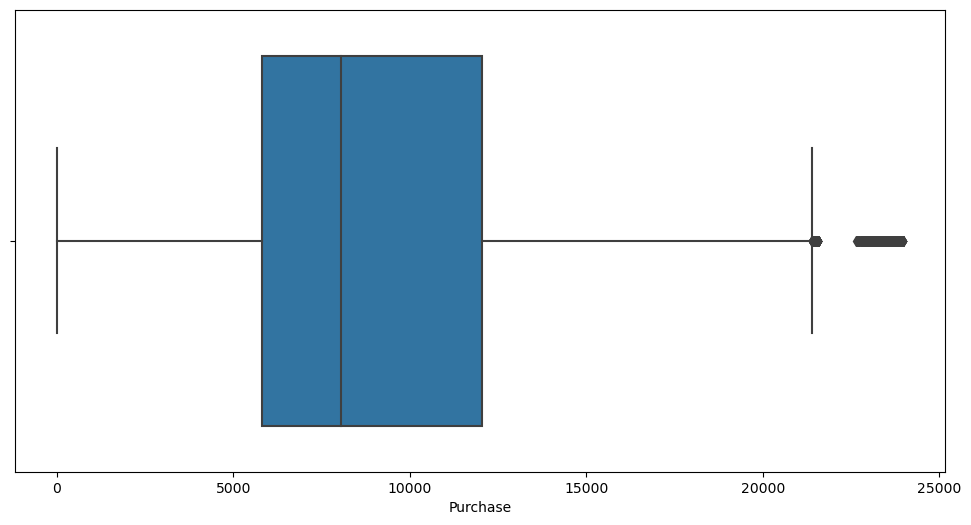

In [23]:
plt.figure(figsize = (12,6))
sns.boxplot(df['Purchase'])

#### Data Exploration

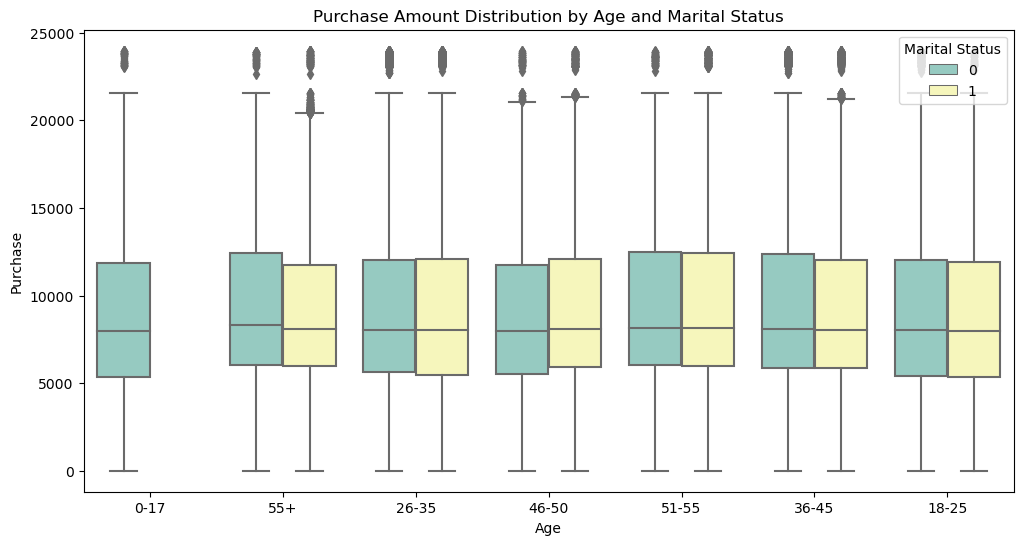

In [36]:
# Plotting
plt.figure(figsize = (12,6))
sns.boxplot(x= 'Age', y= 'Purchase',hue = 'Marital_Status', data = df,palette="Set3")
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Purchase Amount Distribution by Age and Marital Status')
plt.legend(title='Marital Status', loc = 'upper right')
plt.show()

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

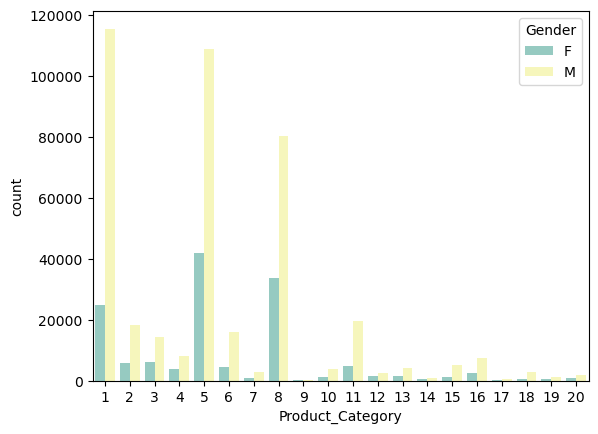

In [43]:
sns.countplot(x= df['Product_Category'], hue = df['Gender'],palette="Set3")

#### How does Marital_Status affect the amount spent?

In [42]:
# Define a function to compute bootstrap confidence intervals
def bootstrap_ci(data, num_samples=1000, ci=95):
    means = []
    n = len(data)
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return lower, upper

# Calculate confidence intervals for the whole dataset
for status in df['Marital_Status'].cat.categories:
    data = df[df['Marital_Status'] == status]['Purchase']
    lower, upper = bootstrap_ci(data)
    print(f"{status}: 95% CI for the mean purchase is between {lower} and {upper}")

# Calculate confidence intervals for smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    print(f"\nSample size: {size}")
    for status in df['Marital_Status'].cat.categories:
        data = df[df['Marital_Status'] == status]['Purchase']
        if len(data) < size:
            print(f"Not enough data for {status} with sample size {size}")
            continue
        sample_data = data.sample(n=size, replace=True, random_state=1)
        lower, upper = bootstrap_ci(sample_data)
        print(f"{status}: 95% CI for the mean purchase is between {lower} and {upper}")

Single: 95% CI for the mean purchase is between 9249.82707633395 and 9282.741680267667
Married: 95% CI for the mean purchase is between 9240.919282785339 and 9283.930499651633

Sample size: 300
Single: 95% CI for the mean purchase is between 8408.291000000001 and 9526.686583333332
Married: 95% CI for the mean purchase is between 8578.679166666667 and 9784.260166666667

Sample size: 3000
Single: 95% CI for the mean purchase is between 9148.000558333333 and 9496.940133333334
Married: 95% CI for the mean purchase is between 9193.100766666666 and 9559.7492

Sample size: 30000
Single: 95% CI for the mean purchase is between 9261.790465 and 9376.112505833335
Married: 95% CI for the mean purchase is between 9159.47936 and 9270.367834166667


Analysis of Marital Status:

#### Entire Dataset:

* Single: 95% CI for the mean purchase is between 9249.83 and 9282.74
* Married: 95% CI for the mean purchase is between 9240.92 and 9283.93


#### Sample Size: 300:

* Single: 95% CI for the mean purchase is between 8408.29 and 9526.69
* Married: 95% CI for the mean purchase is between 8578.68 and 9784.26

#### Sample Size: 3000:

* Single: 95% CI for the mean purchase is between 9148.00 and 9496.94
* Married: 95% CI for the mean purchase is between 9193.10 and 9559.75

#### Sample Size: 30000:

* Single: 95% CI for the mean purchase is between 9261.79 and 9376.11
* Married: 95% CI for the mean purchase is between 9159.48 and 9270.37

#### Interpretation:

* Entire Dataset: The confidence intervals for both marital statuses are quite similar, with a slight difference in the lower bound.

#### Sample Size Comparison:
* For smaller sample sizes (300, 3000), the confidence intervals are wider compared to the entire dataset.
* As the sample size increases (30000), the confidence intervals become narrower.

#### Conclusion:
* Based on the provided data, there isn't a significant difference in the widths of the confidence intervals between marital statuses for the entire dataset. However, as the sample size decreases, the confidence intervals widen, indicating increased uncertainty in the estimates. This widening is consistent for both marital statuses. Therefore, we can conclude that the wider confidence intervals for smaller sample sizes are not specifically attributable to one marital status; rather, they are a result of the reduced sample size.

In [44]:
# Calculate confidence intervals for the whole dataset
for status in df['Gender'].cat.categories:
    data = df[df['Gender'] == status]['Purchase']
    lower, upper = bootstrap_ci(data)
    print(f"{status}: 95% CI for the mean purchase is between {lower} and {upper}")

for size in sample_sizes:
    print(f"\nSample size: {size}")
    for status in df['Gender'].cat.categories:
        data = df[df['Gender'] == status]['Purchase']
        if len(data) < size:
            print(f"Not enough data for {status} with sample size {size}")
            continue
        sample_data = data.sample(n=size, replace=True, random_state=1)
        lower, upper = bootstrap_ci(sample_data)
        print(f"{status}: 95% CI for the mean purchase is between {lower} and {upper}")

F: 95% CI for the mean purchase is between 8710.199660552687 and 8759.566100737064
M: 95% CI for the mean purchase is between 9421.882696030743 and 9452.600793525306

Sample size: 300
F: 95% CI for the mean purchase is between 8475.790916666667 and 9693.833916666666
M: 95% CI for the mean purchase is between 8934.391666666666 and 10065.032

Sample size: 3000
F: 95% CI for the mean purchase is between 8474.650466666668 and 8797.368825
M: 95% CI for the mean purchase is between 9301.423358333333 and 9661.213983333333

Sample size: 30000
F: 95% CI for the mean purchase is between 8689.274371666666 and 8796.312606666666
M: 95% CI for the mean purchase is between 9372.59169 and 9487.446450833333


#### How does Age affect the amount spent?

In [45]:
# Calculate confidence intervals for the whole dataset
for status in df['Age'].cat.categories:
    data = df[df['Age'] == status]['Purchase']
    lower, upper = bootstrap_ci(data)
    print(f"{status}: 95% CI for the mean purchase is between {lower} and {upper}")

for size in sample_sizes:
    print(f"\nSample size: {size}")
    for status in df['Age'].cat.categories:
        data = df[df['Age'] == status]['Purchase']
        if len(data) < size:
            print(f"Not enough data for {status} with sample size {size}")
            continue
        sample_data = data.sample(n=size, replace=True, random_state=1)
        lower, upper = bootstrap_ci(sample_data)
        print(f"{status}: 95% CI for the mean purchase is between {lower} and {upper}")

0-17: 95% CI for the mean purchase is between 8855.75398457158 and 9021.700991590518
18-25: 95% CI for the mean purchase is between 9138.56851821192 and 9199.431216134857
26-35: 95% CI for the mean purchase is between 9230.866243447927 and 9272.896355430878
36-45: 95% CI for the mean purchase is between 9300.703328470272 and 9359.6922950015
46-50: 95% CI for the mean purchase is between 9163.616712435178 and 9252.325568368306
51-55: 95% CI for the mean purchase is between 9486.076576582427 and 9586.947635775694
55+: 95% CI for the mean purchase is between 9269.854473586309 and 9408.057232375373

Sample size: 300
0-17: 95% CI for the mean purchase is between 8265.876166666667 and 9336.72775
18-25: 95% CI for the mean purchase is between 8210.816916666667 and 9289.317666666666
26-35: 95% CI for the mean purchase is between 8802.814666666667 and 9902.102666666668
36-45: 95% CI for the mean purchase is between 8123.565333333333 and 9164.580750000001
46-50: 95% CI for the mean purchase is b

#### Create a report

In [46]:
# Confidence intervals for males and females
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

male_ci = bootstrap_ci(male_data)
female_ci = bootstrap_ci(female_data)

# Check if confidence intervals overlap
overlap = male_ci[1] >= female_ci[0] and female_ci[1] >= male_ci[0]

if overlap:
    print("The confidence intervals for the average amount spent by males and females overlap.")
else:
    print("The confidence intervals for the average amount spent by males and females do not overlap.")

The confidence intervals for the average amount spent by males and females do not overlap.


In [47]:
# Confidence intervals for married and unmarried individuals
married_data = df[df['Marital_Status'] == 'Married']['Purchase']
unmarried_data = df[df['Marital_Status'] == 'Single']['Purchase']

married_ci = bootstrap_ci(married_data)
unmarried_ci = bootstrap_ci(unmarried_data)

# Check if confidence intervals overlap
overlap = married_ci[1] >= unmarried_ci[0] and unmarried_ci[1] >= married_ci[0]

if overlap:
    print("The confidence intervals for the average amount spent by married and unmarried individuals overlap.")
else:
    print("The confidence intervals for the average amount spent by married and unmarried individuals do not overlap.")


The confidence intervals for the average amount spent by married and unmarried individuals overlap.


#### Recommendations

In [48]:
# Confidence intervals for different age groups
age_groups_data = []
age_groups = df['Age'].cat.categories

for age_group in age_groups:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    age_groups_data.append((age_group, bootstrap_ci(age_group_data)))

# Check if confidence intervals overlap between different age groups
overlap = False
for i in range(len(age_groups_data)):
    for j in range(i + 1, len(age_groups_data)):
        ci1 = age_groups_data[i][1]
        ci2 = age_groups_data[j][1]
        if ci1[1] >= ci2[0] and ci2[1] >= ci1[0]:
            overlap = True
            break
    if overlap:
        break

if overlap:
    print("The confidence intervals for the average amount spent by different age groups overlap.")
else:
    print("The confidence intervals for the average amount spent by different age groups do not overlap.")


The confidence intervals for the average amount spent by different age groups overlap.
